In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('Car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
data.drop('Car_Name', axis=1, inplace=True)

In [24]:
data.nunique()


Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [25]:
dtype = data.dtypes
unique = data.nunique()
pd.DataFrame({'dtype' : dtype, 'nunique': unique}).T

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
dtype,int64,float64,float64,int64,object,object,object,int64
nunique,16,156,147,206,3,2,2,3


In [26]:
col = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
data[col] = data[col].astype('category')
pd.DataFrame(data.dtypes).T

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,int64,float64,float64,int64,category,category,category,category


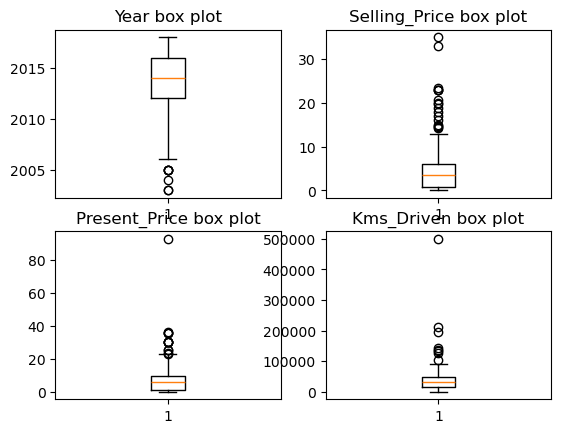

In [27]:
numCols = data.select_dtypes('number').columns
plt.figure()
for i, col in enumerate(numCols):
    plt.subplot(2, 2, i+1)
    plt.boxplot(data[col])
    plt.title(f'{col} box plot')

## Outliers Handling - Method 1

In [28]:
for col in numCols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lf = Q1 - 1.5 * IQR
    Up = Q3 + 1.5 *IQR
    Outliers = data.loc[((data[col] > Up) | (data[col] < Lf))]
    data[col] = np.where(data[col] > Up, Up, data[col])
    data[col] = np.where(data[col] < Lf, Lf, data[col])
    

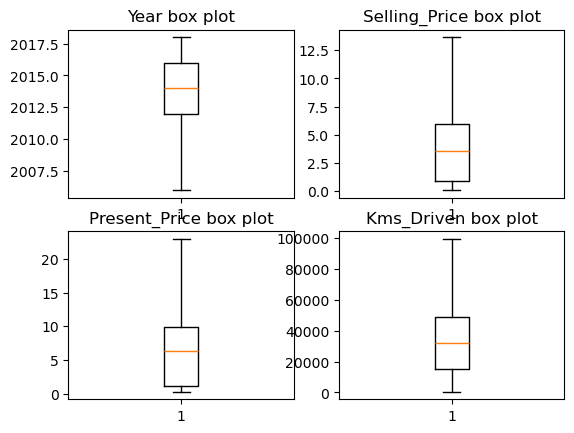

In [29]:
plt.figure()
for i, col in enumerate(numCols):
    plt.subplot(2, 2, i+1)
    plt.boxplot(data[col])
    plt.title(f'{col} box plot')

## Outliers Handling - Method 2

In [30]:
Q1 = data['Year'].quantile(0.25)
Q3 = data['Year'].quantile(0.75)
IQR = Q3 - Q1
Lf = Q1 - 1.5 * IQR
Up = Q3 + 1.5 * IQR
Lf, Up
    

(2006.0, 2022.0)

In [31]:
Outliers = data.loc[((data['Year'] > Up) | (data['Year'] < Lf))]

print(len(data))
print(len(Outliers))

301
0


In [32]:
data['Year'] = np.where(data['Year'] > Up, Up, data['Year'])
data['Year'] = np.where(data['Year'] < Lf, Lf, data['Year'])

Text(0.5, 1.0, 'Year box plot')

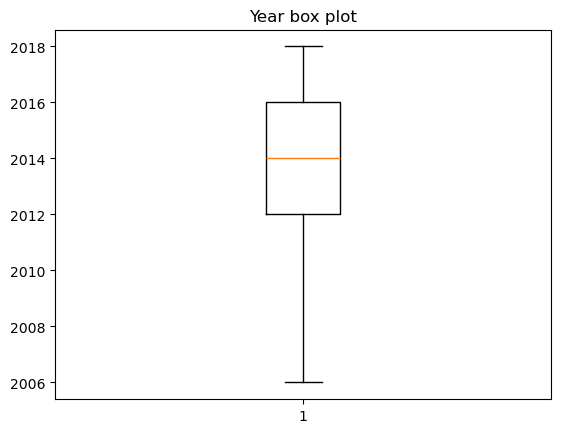

In [33]:
plt.figure()
plt.boxplot(data['Year'])
plt.title(f'Year box plot')